# Linear Regression with One Feature

## Dataset used:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parte I: una característica
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

# 1. Dataset visualization

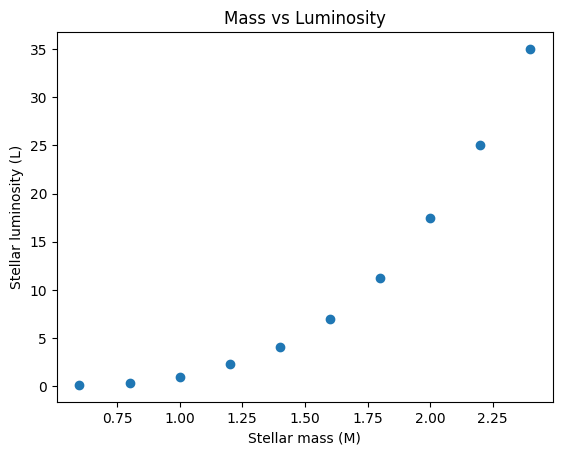

In [4]:
plt.figure()
plt.scatter(M, L)
plt.xlabel("Stellar mass (M)")
plt.ylabel("Stellar luminosity (L)")
plt.title("Mass vs Luminosity")
plt.show()

# 2. Model and loss

## Prediction:

In [7]:
def predict(M, w, b):
    """Compute the predicted y values for given x, using f_{w,b}(x) = w x + b."""
    return w * M + b

w_test = 0.0
b_test = 0.0
y_hat_test = predict(M, w_test, b_test)
print("First 5 predictions with w=0, b=0:", y_hat_test[:5])

First 5 predictions with w=0, b=0: [0. 0. 0. 0. 0.]


## MSE:

In [8]:
def compute_cost(M, L, w, b):
    m = M.shape[0]
    L_hat = w * M + b  # f_{w,b}(x)
    errors = L_hat - L
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

print("Cost with w=0, b=0:", compute_cost(M, L, w_test, b_test))

Cost with w=0, b=0: 117.69675000000001


# 3. Cost surface

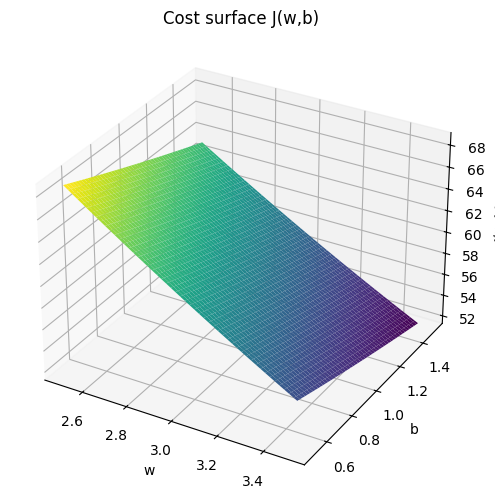

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

w_values = np.linspace(2.5, 3.5, 200)
b_values = np.linspace(0.5, 1.5, 200)

W, B = np.meshgrid(w_values, b_values)
J_vals = np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J_vals[i, j] = compute_cost(M, L, W[i, j], B[i, j])


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J_vals, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("J(w,b)")
ax.set_title("Cost surface J(w,b)")
plt.show()


# 4. Gradients